## Authors of this A R T  :smile:


| Name                    | Is he cool enough ?? |
|-------------------------|----------------------|
| **Mohammed El-Bushnaq** | INDEEEED             |
| Ahmed Mostafa           | NO.                  |
| Abdel-Khalek El-Fakeh   | NO.                  |
| Abdullah Shazly         | NO.                  |
| Tarek Salah             | NO.                  |

# Importing the Libraries

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Implementation of Boundary Tracing (cv2 is not used :))) )

In [8]:
def binarize(name):
    im = cv2.imread(name)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    img_blur = cv2.GaussianBlur(im_gray, (7, 7), sigmaX=0, sigmaY=0)     
    edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
    type(edges)
    test = edges
    plt.subplot(1, 2, 1)
    plt.imshow(edges, cmap=plt.get_cmap('gray'))
    plt.title('Binary Image')
    return edges


def detectedges(binaryimage):
    edgespixels = np.where(binaryimage == 255)             #extract the edges (white pixels)  --> 2 lists (x, y coords)
    edgespixelslis = [(edgespixels[0][i], edgespixels[1][i]) for i in range(0, len(edgespixels[0]))]
    setA = set(edgespixelslis)
    dire = 7
    pn1 = None                                             #Next scanned pixel
    dirval = [(1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (1, -1)]
    clust = []                                             #loop over data
    clusts = []                                            #Appending after the for loop
    for pixel in setA:
        oldpixel = (0, 0)
        newpixel = (0, 0)
        pn = pixel
        while (pn != oldpixel) and (pn1 != newpixel):      #pn current scanned pixel
            clust.append(pn)
            if dire % 2 == 0:
                dire = (dire + 7) % 8
            else: 
                dire = (dire + 6) % 8   
            for k in range(len(dirval)):
                j = (dire + k) % 8
                try:
                    pn1 = (pn[0] + dirval[j][0], pn[1] + dirval[j][1])
                    if binaryimage[pn1] == binaryimage[pn]:       #Accessing the 2-D array
                        if oldpixel == newpixel:                  #initiale cond
                            oldpixel = pn                         
                            newpixel = pn1
                        pn = pn1
                        clust.append(pn)
                        break
                except:
                    pass
        clusts.append(clust)
        setB = set(clust)
        setA = setA.difference(setB)
        clust = []
    x = []
    y = []
    for ele in clusts:
        x.append(ele[0][0])
        y.append(ele[0][1])
    plt.subplot(1, 2, 2)
    plt.imshow(edges1, cmap=plt.get_cmap('gray'))
    plt.scatter(y, x, s=7)    

### Boundary Tracing using CV2 Libarary :  

In [22]:
# Drawing Shapes
def ImageProcessing():
    image = np.zeros((512, 512, 3), np.uint8)
    cv2.circle(image, (256,256), 200, (60,200,151), 20)
    cv2.circle(image, (14,234), 100, (110,40,151), 20)
    cv2.circle(image, (200,52), 150, (60,200,51), 20)

    plt.figure(figsize = (10,10))
    plt.imshow(image)
#     cv2.imwrite('hough circles.jpg', image)
#     cv2.imshow('Black Image', image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
#     fig.set_size_inches(20, 20)
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # apply binary thresholding
    ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

    plt.imshow(thresh)
#     # visualize the binary image
#     cv2.imshow('Binary image', thresh)
    
#     cv2.waitKey(0)
#     cv2.imwrite('image_thres1.jpg', thresh)     #Write the img
#     cv2.destroyAllWindows()


    
def ImageProc2():
    # to actually visualize the effect of `CHAIN_APPROX_SIMPLE`, we need a proper image
    image1 = cv2.imread('image_thres1.jpg')
    height, width, channels = image1.shape
    image = np.zeros((height, width, channels), np.uint8)
    img_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

    ret, thresh1 = cv2.threshold(img_gray1, 150, 255, cv2.THRESH_BINARY)
    contours2, hierarchy2 = cv2.findContours(thresh1, cv2.RETR_TREE,
                                                   cv2.CHAIN_APPROX_SIMPLE)
    
    cv2.drawContours(image, contours2, -1, (255, 255, 255), 2, cv2.LINE_AA)
    plt.figure(figsize = (10,10))
    plt.imshow(image)

    image_copy2 = image1.copy()
    cv2.drawContours(image_copy2, contours2, -1, (0, 255, 0), 2, cv2.LINE_AA)
    plt.imshow(image_copy2)
#     cv2.imshow('SIMPLE Approximation contours', image_copy2)
#     cv2.waitKey(0)
    image_copy3 = image1.copy()
    for i, contour in enumerate(contours2): # loop over one contour area
       for j, contour_point in enumerate(contour): # loop over the points
           # draw a circle on the current contour coordinate
           cv2.circle(image_copy3, ((contour_point[0][0], contour_point[0][1])), 2, (0, 255, 0), 2, cv2.LINE_AA)
    # see the results
    plt.imshow(image_copy3)
#     cv2.imshow('CHAIN_APPROX_SIMPLE Point only', image_copy3)
#     cv2.waitKey(0)
#     cv2.imwrite('contour_point_simple.jpg', image_copy3)
#     cv2.destroyAllWindows()

# Hough Transform Using cv2

In [14]:
def hough_transform(min_cntr_dst):
    img = cv2.imread('smarties.png')
    output = img.copy()
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)      
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp = 1, minDist = min_cntr_dst,       #x, y, R
              param1 = 100, param2 = 30, minRadius = 0, maxRadius = 0)                        #if mR <0 returns only the center

    detected_circles = np.uint16(np.around(circles)) #Casting to uint16
    
    for(x, y, r) in detected_circles[0, :]:
        cv2.circle(output, (x, y), r ,(140, 30, 220), 3) 
        cv2.circle(output, (x, y), 2 ,(0, 0, 0), 3)       #Center --> as rad is very small (2)

    plt.imshow(output)    
#     plt.imshow('output', output) #for a new tab :)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

## HoughCircles Arguments Explaination

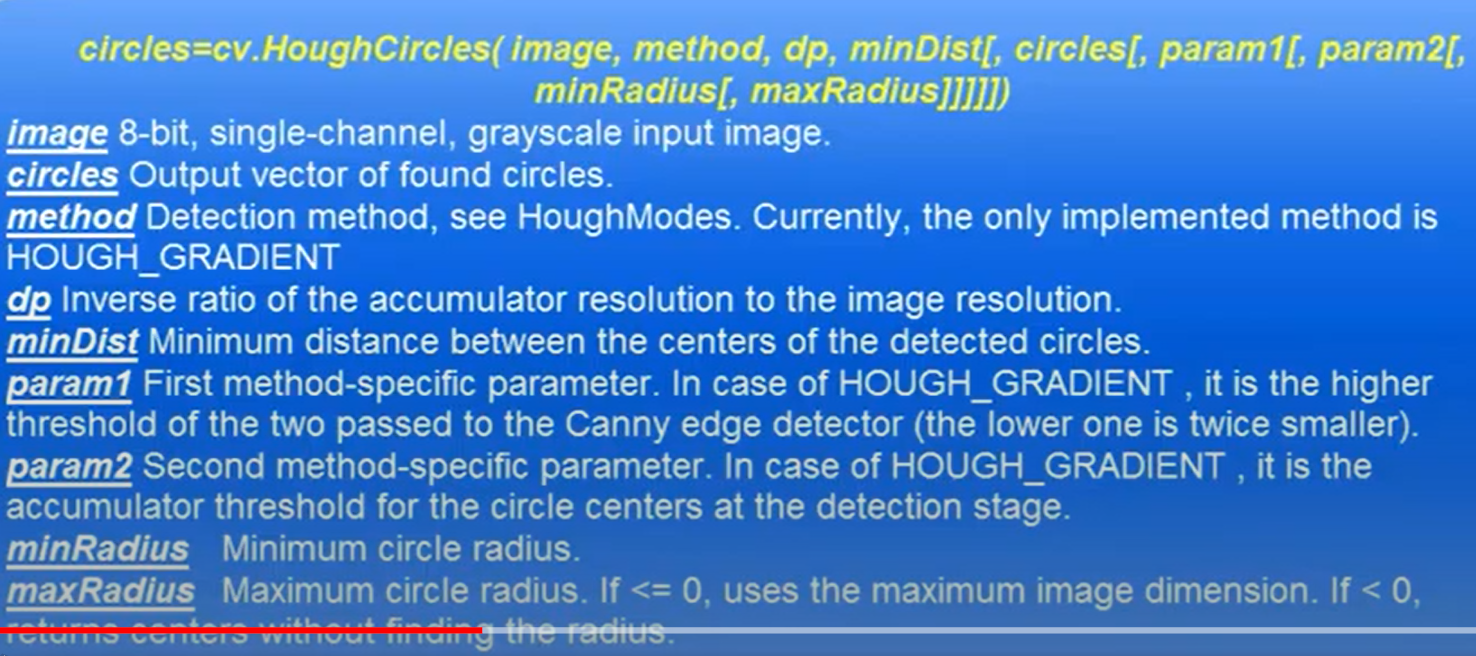

## Test the Code :))) 

#### Hough Circles

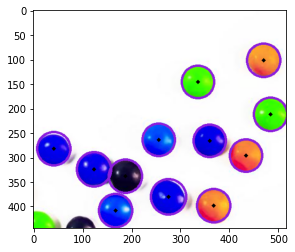

In [15]:
hough_transform(50) #50 in MinDist arg

#### Boundary Tracing

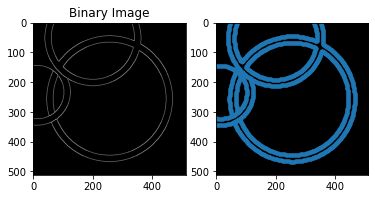

In [16]:
edges1 = binarize("hough circles.jpg")
detectedges(edges1)
plt.show()

#### Boundary Tracing

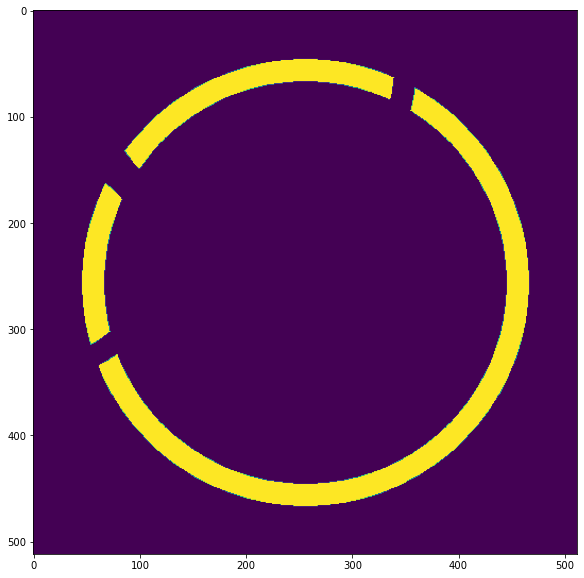

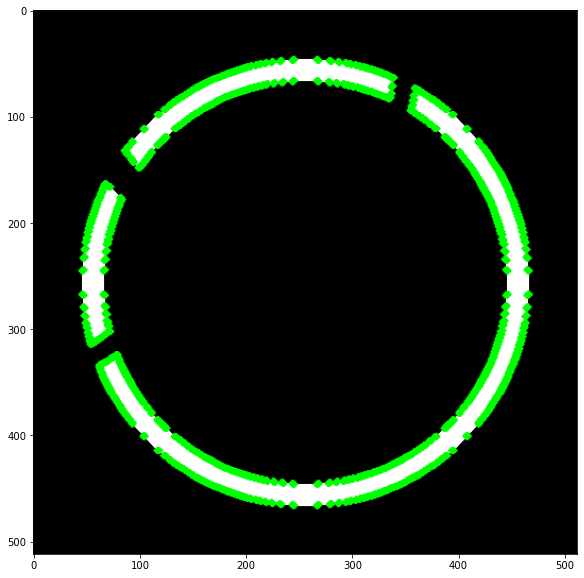

In [23]:
ImageProcessing()
ImageProc2()